<a href="https://colab.research.google.com/github/CatalinaM15/Challenge_AluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


### Exploracion de datos

In [ ]:
tienda.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [ ]:
tienda.Producto.unique()

array(['Asistente virtual', 'Mesa de comedor', 'Juego de mesa',
       'Microondas', 'Silla de oficina', 'Bloques de construcción',
       'Muñeca bebé', 'Lavavajillas', 'Lavadora de ropa',
       'Carrito de control remoto', 'Refrigerador', 'Auriculares',
       'Olla de presión', 'Bicicleta', 'Ciencia de datos con Python',
       'Balón de voleibol', 'Ajedrez de madera', 'TV LED UHD 4K',
       'Vaso térmico', 'Kit de bancas', 'Dashboards con Power BI',
       'Cubertería', 'Set de ollas', 'Batería', 'Cuerda para saltar',
       'Estufa', 'Cama box', 'Impresora', 'Mesa de noche', 'Armario',
       'Dinosaurio Rex', 'Guitarra eléctrica', 'Secadora de ropa',
       'Sofá reclinable', 'Tablet ABXY', 'Cubo mágico 8x8',
       'Set de vasos', 'Modelado predictivo', 'Iphone 15', 'Mochila',
       'Balón de baloncesto', 'Auriculares con micrófono', 'Sillón',
       'Guitarra acústica', 'Iniciando en programación', 'Celular ABXY',
       'Smartwatch', 'Mesa de centro', 'Cama king', 'Smart TV

In [ ]:
tienda["Categoría del Producto"].unique()

array(['Electrónicos', 'Muebles', 'Juguetes', 'Electrodomésticos',
       'Artículos para el hogar', 'Deportes y diversión', 'Libros',
       'Instrumentos musicales'], dtype=object)

In [ ]:
tienda["Método de pago"].unique()

array(['Tarjeta de crédito', 'Nequi', 'Cupón', 'Tarjeta de débito'],
      dtype=object)

In [ ]:
tienda["Tienda"] = "Tienda_1"
tienda2["Tienda"] = "Tienda_2"
tienda3["Tienda"] = "Tienda_3"
tienda4["Tienda"] = "Tienda_4"

In [ ]:
tiendaGeneral = pd.concat(
    [tienda, tienda2, tienda3, tienda4],
    ignore_index=True
)

#1. Análisis de facturación



In [ ]:
Ingresos_totales = tiendaGeneral.groupby(["Tienda"])["Precio"].sum().astype(int).reset_index(name="Precio")
Ingresos_totales

,Tienda,Precio
0,Tienda_1,1150880400
1,Tienda_2,1116343500
2,Tienda_3,1098019600
3,Tienda_4,1038375700


# 2. Ventas por categoría

In [ ]:
Ventas = tiendaGeneral.groupby(["Tienda","Categoría del Producto"])["Producto"].count().reset_index(name="Cantidad")

In [ ]:
Ventas.sort_values(["Tienda", "Cantidad"], ascending=[True, False])

,Tienda,Cantidad
0,Tienda_1,2359
1,Tienda_2,2359
2,Tienda_3,2359
3,Tienda_4,2358


In [ ]:
categoria_top = Ventas.loc[
    Ventas.groupby("Tienda")["Cantidad"].idxmax()
]

categoria_top

,Tienda,Categoría del Producto,Cantidad
7,Tienda_1,Muebles,465
15,Tienda_2,Muebles,442
23,Tienda_3,Muebles,499
31,Tienda_4,Muebles,480


# 3. Calificación promedio de la tienda


In [ ]:
Calif_promedio = tiendaGeneral.groupby(["Tienda"])["Calificación"].mean().reset_index(name="Calificación promedio")
Calif_promedio

,Tienda,Calificación promedio
0,Tienda_1,3.976685
1,Tienda_2,4.037304
2,Tienda_3,4.048326
3,Tienda_4,3.995759


# 4. Productos más y menos vendidos

In [ ]:
top_products = tiendaGeneral.groupby(["Tienda", "Producto"])["Producto"].count().reset_index(name="Cantidad")
productos_top = top_products.loc[
    top_products.groupby(["Tienda"])["Cantidad"].idxmax()
]

productos_top

,Tienda,Producto,Cantidad
1,Tienda_1,Armario,60
75,Tienda_2,Iniciando en programación,65
129,Tienda_3,Kit de bancas,57
163,Tienda_4,Cama box,62


In [ ]:
bottom_products = tiendaGeneral.groupby(["Tienda", "Producto"])["Producto"].count().reset_index(name="Cantidad")
productos_bottom = bottom_products.loc[
    bottom_products.groupby(["Tienda"])["Cantidad"].idxmin()
]

productos_bottom

,Tienda,Producto,Cantidad
4,Tienda_1,Auriculares con micrófono,33
77,Tienda_2,Juego de mesa,32
111,Tienda_3,Bloques de construcción,35
175,Tienda_4,Guitarra eléctrica,33


# 5. Envío promedio por tienda

In [ ]:
envio_promedio = tiendaGeneral.groupby(["Tienda"])['Costo de envío'].mean().reset_index(name="Promedio Envio por tienda").round(2)


envio_promedio

,Tienda,Promedio Envio por tienda
0,Tienda_1,26018.61
1,Tienda_2,25216.24
2,Tienda_3,24805.68
3,Tienda_4,23459.46


## **Visualizacion**


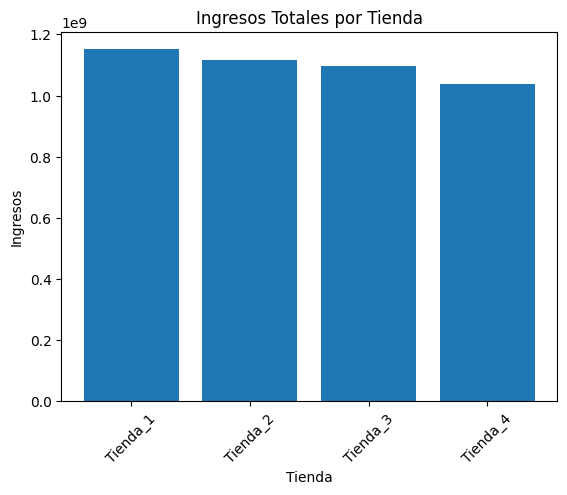

In [ ]:
# envio_promedio productos_bottom productos_top Calif_promedio Ingresos_totales ventas

Ingresos_totales

plt.figure()
plt.bar(Ingresos_totales["Tienda"], Ingresos_totales["Precio"])
plt.title("Ingresos Totales por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingresos")
plt.xticks(rotation=45)
plt.show()

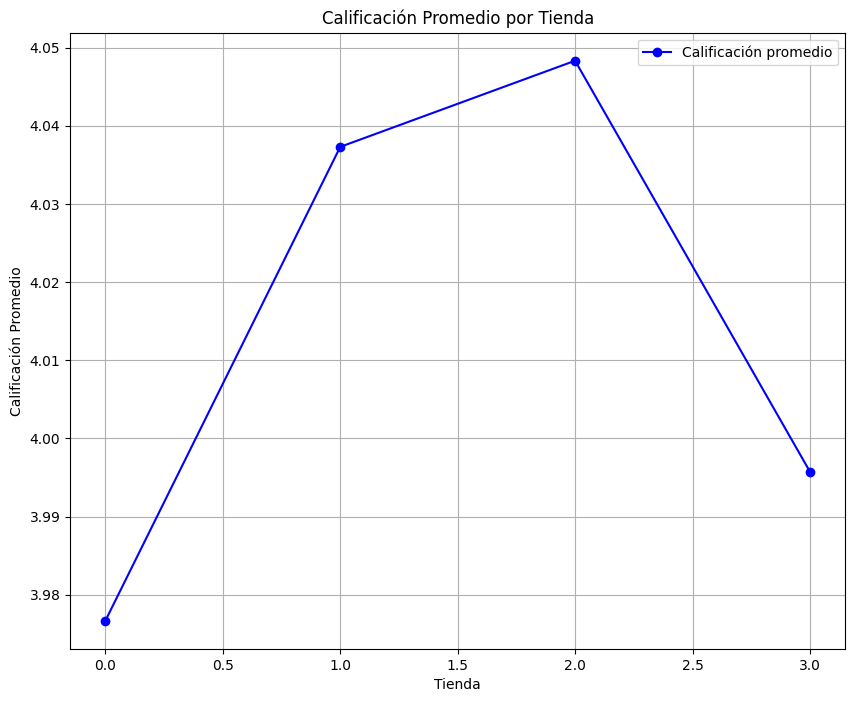

In [ ]:
Calif_promedio.plot(
    kind='line',
    figsize=(10,8),
    color='blue',
    marker='o'
)

plt.title("Calificación Promedio por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación Promedio")
plt.grid(True)
plt.show()


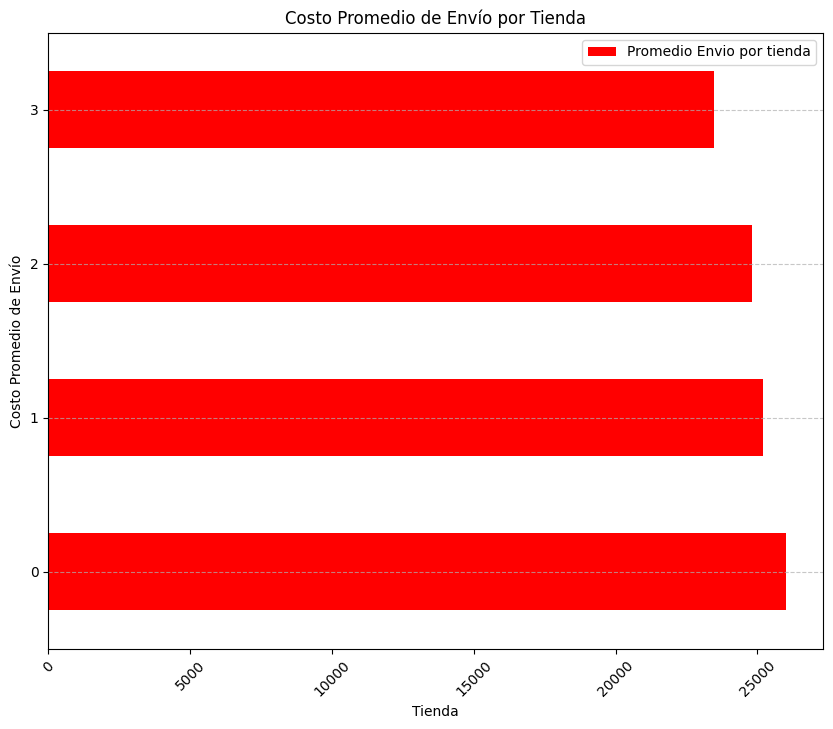

In [ ]:
envio_promedio.plot(
    kind='barh',
    figsize=(10,8),
    color='red'
)

plt.title("Costo Promedio de Envío por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo Promedio de Envío")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

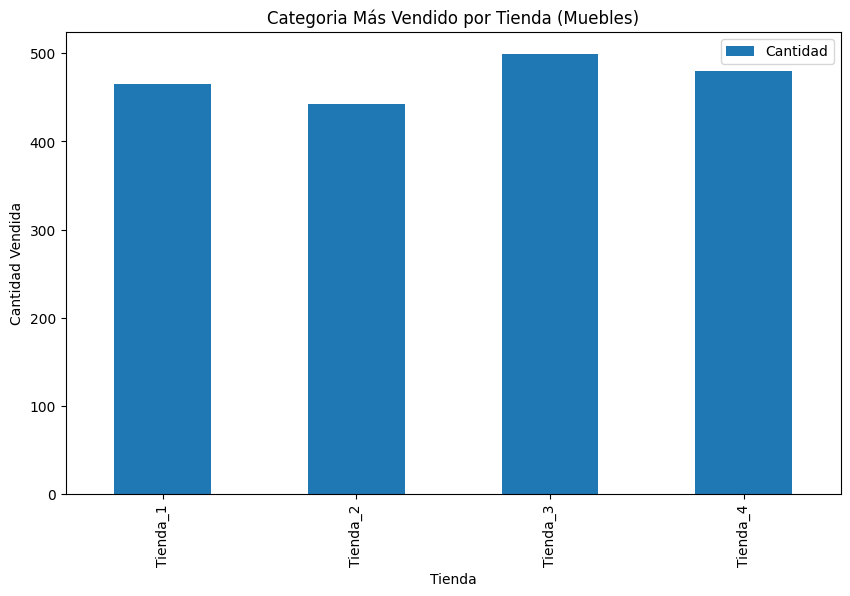

In [ ]:
categoria_top.plot(
    x="Tienda",
    y="Cantidad",
    kind="bar",
    figsize=(10,6)
)

plt.title("Categoria Más Vendido por Tienda (Muebles)")
plt.ylabel("Cantidad Vendida")
plt.show()

# Análisis de Desempeño de Alura Store

## 1. Introducción

El presente análisis tiene como objetivo evaluar el desempeño de las cuatro tiendas de la cadena **Alura Store**, con el fin de determinar cuál de ellas presenta menor eficiencia operativa y, por lo tanto, debería ser considerada para su venta.

Para ello, se analizaron distintas métricas clave relacionadas con el rendimiento comercial, la percepción del cliente y los costos operativos.
Entre las variables estudiadas se incluyen:

- Ingresos totales por tienda  
- Categorías de productos más y menos vendidas  
- Calificación promedio otorgada por los clientes  
- Productos más y menos vendidos  
- Costo promedio de envío  

A partir de estos indicadores y sus respectivas visualizaciones, se elaboró la siguiente recomendación.

---

## 2. Desarrollo del Análisis

### 2.1 Ingresos Totales por Tienda

El análisis de ingresos permitió identificar diferencias significativas entre las tiendas. Se observó que:

- **Tienda 1** presenta los mayores ingresos totales.[$1 150 880 400]

- **Tienda 4** registra los ingresos más bajos.[$1 038 375 700]

---

### 2.2 Categorías Más y Menos Vendidas

El análisis por categoría identifico que en las 4 tiendas las tres categorias principales son las mismas Mebles, Electronicos y Juguetes las cuales se llevan la mayoria de ventas

Donde en muebles la mayor cantidad de ventas la tiene la tienda 3 seguida por la tienda 4, la tienda 1 y finalmente la tienda 2.

---

### 2.3 Calificación Promedio de los Clientes

La percepción del cliente es un indicador fundamental de sostenibilidad comercial.

Del análisis se concluye que:

- **Tienda 3** cuenta con la mejor calificación promedio.
- **Tienda 1** presenta la menor valoración por parte de los clientes.

Una baja calificación puede indicar problemas en servicio, calidad del producto o experiencia de compra.

---

### 2.4 Productos Más y Menos Vendidos

El análisis de productos permitió identificar:

- El producto con mayor volumen de ventas por tienda.
- Posibles dependencias comerciales en productos específicos.


**Tienda 1:**
Armario 60 , Auriculares con micrófono 33

**Tienda 2:**
**Iniciando en programación 65**, **Juego de mesa 32**

**Tienda 3:**
Kit de bancas 57, Bloques de construcción 35

**Tienda 4:**
Cama box 62, Guitarra eléctrica 33


---

### 2.5 Costo Promedio de Envío

El costo logístico impacta directamente la rentabilidad.

Se identificó que:

- **Tienda 1** tiene el costo promedio de envío más alto. (26018.61)
- **Tienda 4** presenta costos logísticos más eficientes. (23459.46)

Un mayor costo de envío puede reducir el margen de ganancia y afectar la competitividad.

---

## 3. Conclusión y Recomendación

Con base en los indicadores analizados — ingresos totales, volumen de ventas por categoría, calificación promedio, productos más vendidos y costos de envío — se concluye que la **Tienda 4** es la que presenta el desempeño menos favorable en comparación con las demás.

Esta decisión se fundamenta en los siguientes puntos:

- Presenta los ingresos más bajos.
- Registra una de las calificaciones promedio más bajas.

Por lo tanto, se recomienda que el Sr. Juan considere la venta de la **Tienda 4** según el análisis realizado.
